<a href="https://colab.research.google.com/github/JohnTaco93/Foxconn-industrial-AI-Data-Challenge/blob/master/1.Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#The cutting tool #1 dataset is going to be analized in this kernel.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings('ignore')
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
path_data = "/content/gdrive/My Drive/Foxconn2020-tool-wear/Data-Original/"

In [5]:
data01_plc = pd.read_csv(path_data+'/01-Training Data/01/PLC/plc.csv')

In [6]:
data01_plc.head()

,time,spindle_load,x,y,z,csv_no
0,11:28:07:127,0.0824,-20.9572,-17.6915,-89.6468,1
1,11:28:07:137,0.0824,-20.9572,-17.6915,-89.6468,1
2,11:28:07:147,0.0824,-20.9572,-17.6915,-89.6468,1
3,11:28:07:157,0.0824,-20.9572,-17.6915,-89.6468,1
4,11:28:07:167,0.0824,-20.9572,-17.6915,-89.6468,1


In [7]:
data01_plc.tail()

,time,spindle_load,x,y,z,csv_no
110022,16:28:59:803,0.006104,-1.1088,-201.1264,-86.207,48
110023,16:28:59:813,0.006104,-1.1088,-201.1264,-86.207,48
110024,16:28:59:973,0.006104,-1.1088,-201.1264,-86.207,48
110025,16:28:59:983,0.006104,-1.1088,-201.1264,-86.207,48
110026,16:28:59:993,0.006104,-1.1088,-201.1264,-86.207,48


In [8]:
data01_plc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110027 entries, 0 to 110026
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time          110027 non-null  object 
 1   spindle_load  110027 non-null  float64
 2   x             110027 non-null  float64
 3   y             110027 non-null  float64
 4   z             110027 non-null  float64
 5   csv_no        110027 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


In [9]:
# All features are numeric, except the time column. It has to be changed from string to datetime.

In [10]:
data01_plc.describe()

,spindle_load,x,y,z,csv_no
count,110027.000000,110027.000000,110027.000000,110027.000000,110027.000000
mean,14.317802,-624.955347,113.454481,-436.728390,24.527625
std,5.446694,241.283467,152.304189,72.033976,13.818963
min,0.000000,-936.456200,-201.126400,-494.520000,1.000000
25%,11.499374,-801.309200,-7.970500,-474.520000,13.000000
50%,14.471877,-689.149900,106.375400,-444.520000,25.000000
75%,17.719047,-558.219300,247.263200,-427.120000,36.000000
max,37.998596,-1.108800,376.040700,0.000000,48.000000


In [11]:
# According to the table above, it seems there aren't outliers. Values are ok for each feature.

In [12]:
# Box plots for each feature

Text(0.5, 0, 'Spindle Load')

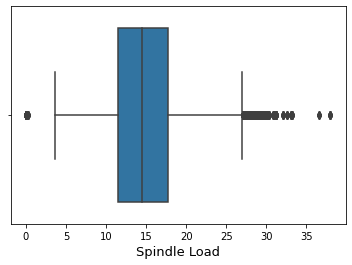

In [13]:
fig, ax = plt.subplots()
ax = sns.boxplot(x=data01_plc["spindle_load"])
plt.xlabel('Spindle Load', fontsize=13)

Text(0.5, 0, 'X (position)')

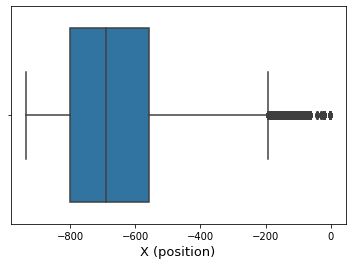

In [14]:
ax = sns.boxplot(x=data01_plc["x"])
plt.xlabel('X (position)', fontsize=13)

Text(0.5, 0, 'Y (position)')

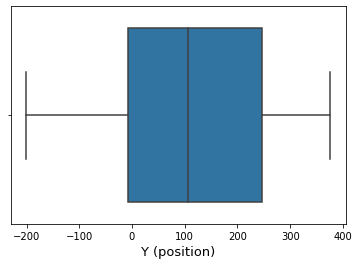

In [15]:
ax = sns.boxplot(x=data01_plc["y"])
plt.xlabel('Y (position)', fontsize=13)

Text(0.5, 0, 'Z (position)')

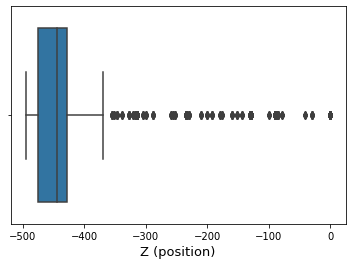

In [16]:
ax = sns.boxplot(x=data01_plc["z"])
plt.xlabel('Z (position)', fontsize=13)

In [17]:
# Line plots for each feature

Text(0, 0.5, 'Spindle Load')

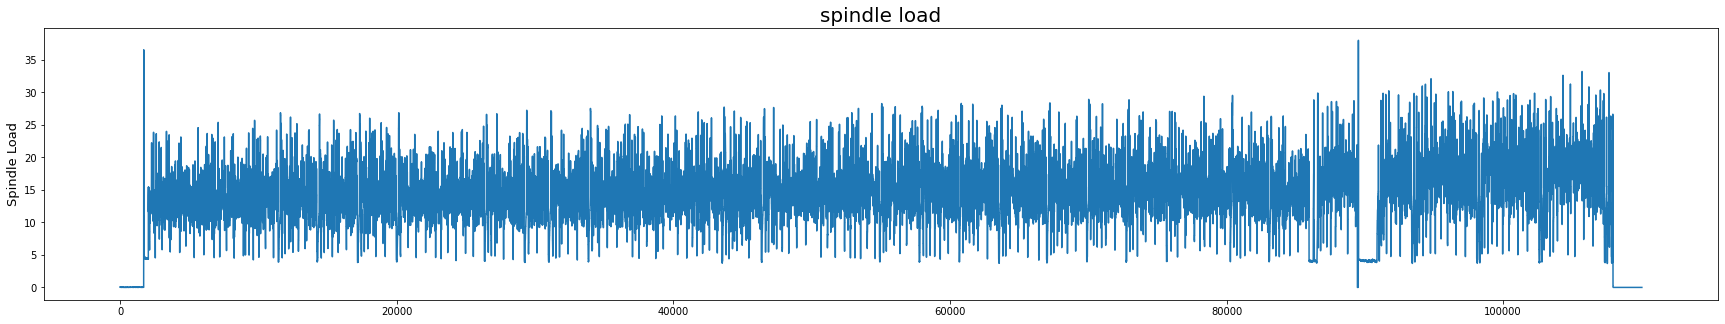

In [18]:
fig, ax = plt.subplots()
data01_plc.spindle_load.plot.line(figsize=(30,5))
plt.title('spindle load', fontsize=20)
plt.ylabel('Spindle Load', fontsize=13)

Text(0, 0.5, 'X')

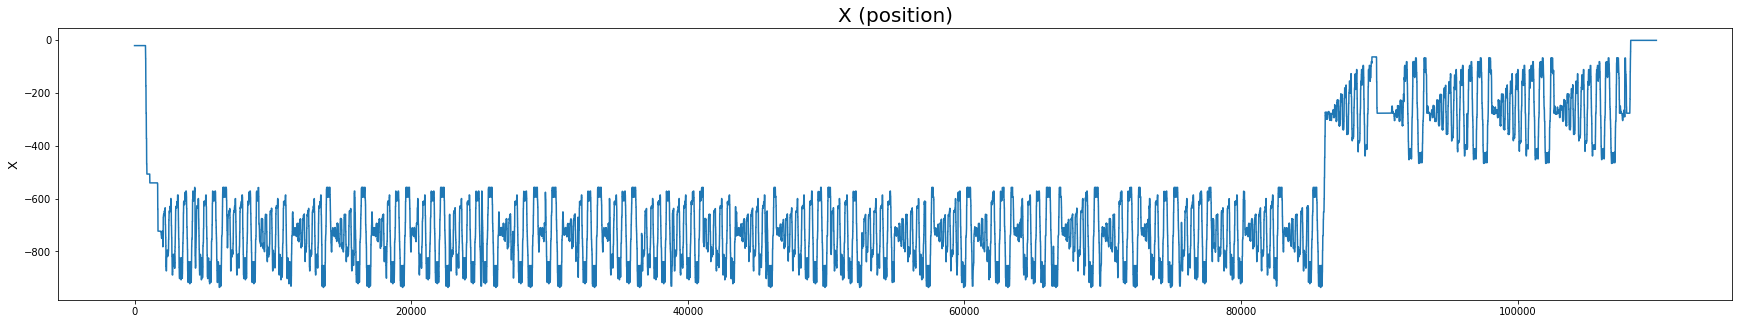

In [19]:
data01_plc.x.plot.line(figsize=(30,5))
plt.title('X (position)', fontsize=20)
plt.ylabel('X', fontsize=13)

Text(0, 0.5, 'Y')

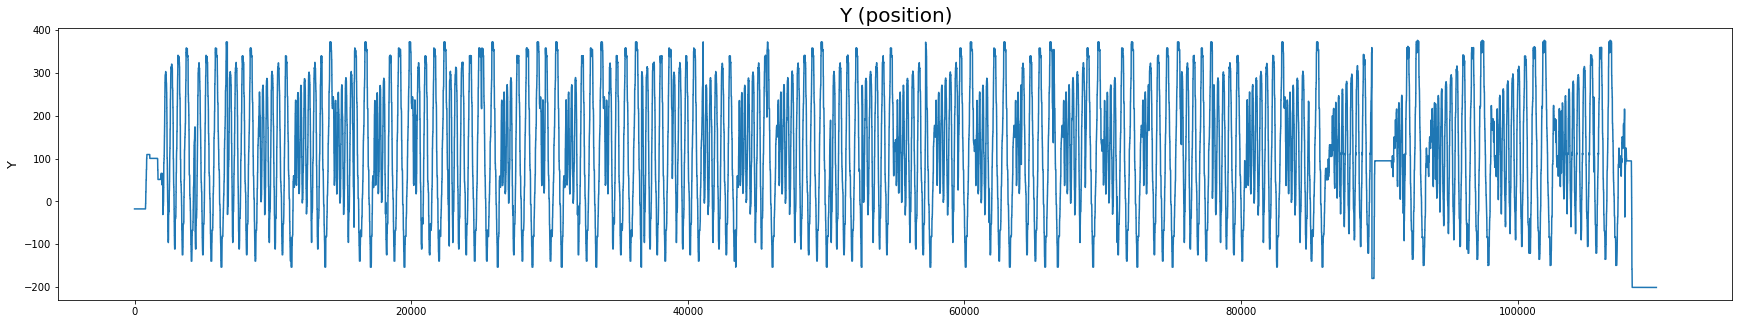

In [20]:
data01_plc.y.plot.line(figsize=(30,5))
plt.title('Y (position)', fontsize=20)
plt.ylabel('Y', fontsize=13)

Text(0, 0.5, 'Z')

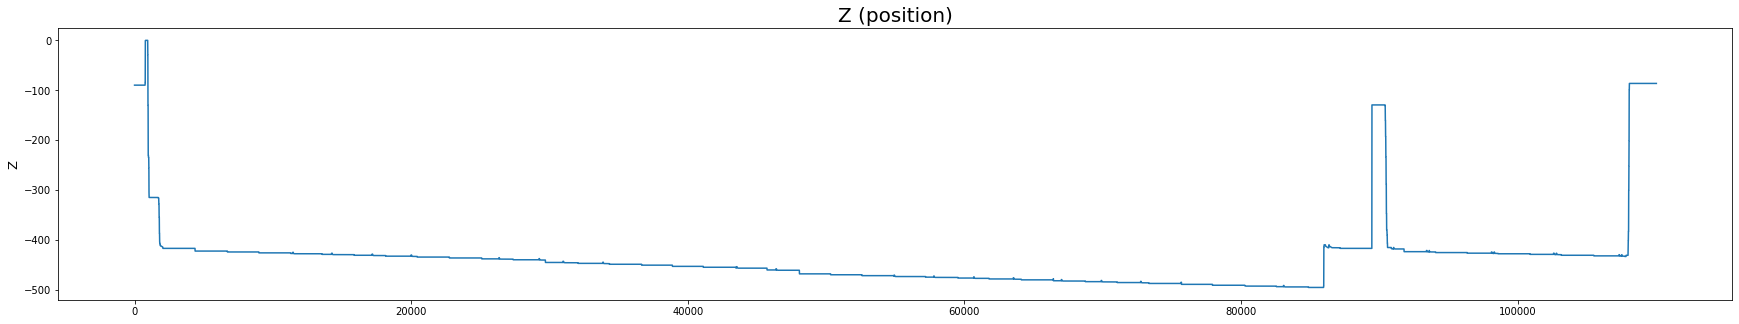

In [21]:
data01_plc.z.plot.line(figsize=(30,5))
plt.title('Z (position)', fontsize=20)
plt.ylabel('Z', fontsize=13)

In [22]:
#Analyzing the vibration data of the cutting tool #1

In [23]:
# joining all 48 vibration-current dateset
data01_sensor=pd.DataFrame()
for i in range(48):
  data_sensor=pd.read_csv(path_data+'/01-Training Data/01/Sensor/'+str(i+1)+'.csv')
  #csv_no is the order of the dataset. There are 48 datasets in total
  data_sensor['csv_no']=i+1
  data01_sensor=data01_sensor.append(data_sensor, ignore_index=True)


In [24]:
data01_sensor.head()

,vibration_1,vibration_2,vibration_3,current,csv_no
0,0.024189,-0.013899,0.045651,-31.837665,1
1,0.043586,-0.012801,0.027327,-32.089322,1
2,0.038096,-0.000727,0.029770,-31.975896,1
3,0.032973,-0.014143,0.050782,-32.031778,1
4,0.037608,-0.027193,0.064097,-31.946010,1


In [25]:
data01_sensor.describe()

,vibration_1,vibration_2,vibration_3,current,csv_no
count,7.289600e+07,7.289600e+07,7.289598e+07,7.289600e+07,7.289600e+07
mean,3.161423e-02,inf,NaN,-6.011789e-01,2.453854e+01
std,2.280838e+00,inf,NaN,3.473529e+01,1.387013e+01
min,-2.333084e+01,-1.731969e+308,-1.682783e+308,-6.867473e+01,1.000000e+00
25%,-1.261533e+00,-1.102329e+00,-1.418302e+00,-3.464923e+01,1.200000e+01
50%,3.431449e-02,3.176286e-03,4.483549e-03,-3.925781e-01,2.500000e+01
75%,1.309301e+00,1.106852e+00,1.356662e+00,3.386683e+01,3.600000e+01
max,2.336519e+01,1.614959e+308,1.674493e+308,6.809106e+01,4.800000e+01


In [26]:
#According to the table above, it seems that in vibration_2 and vibration_3 there are outliers that might seriously affect the analysis.

Text(0, 0.5, 'vibration_1')

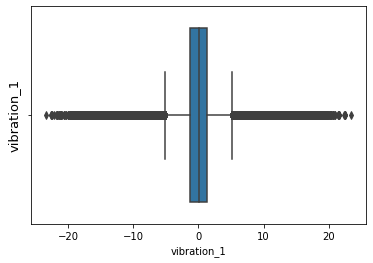

In [27]:
ax = sns.boxplot(x=data01_sensor["vibration_1"])
plt.ylabel('vibration_1', fontsize=13)

Text(0, 0.5, 'current')

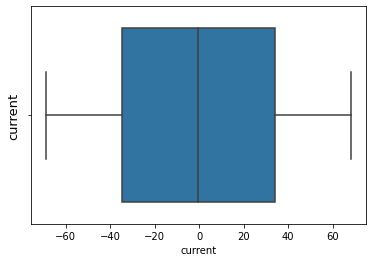

In [28]:
ax = sns.boxplot(x=data01_sensor["current"])
plt.ylabel('current', fontsize=13)

Text(0, 0.5, 'vibration_2')

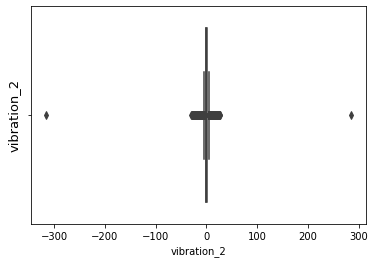

In [29]:
#outliers in vibration_2 are too big, so we limit the absolute value of vibration to 500.
ax = sns.boxplot(x=data01_sensor[abs(data01_sensor["vibration_2"])<500]['vibration_2'])
plt.ylabel('vibration_2', fontsize=13)

Text(0, 0.5, 'vibration_3')

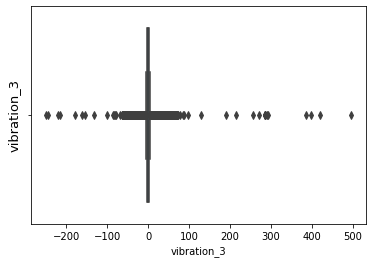

In [30]:
#outliers in vibration_3 are too big, so we limit the absolute value of vibration to 500.
ax = sns.boxplot(x=data01_sensor[abs(data01_sensor["vibration_3"])<500]['vibration_3'])
plt.ylabel('vibration_3', fontsize=13)

In [31]:
#According to the box plot vibration 2 and 3, still have outliers even if I limit the values to 500.

In [32]:
# Line plots for each feature

Text(0, 0.5, 'vibration_1')

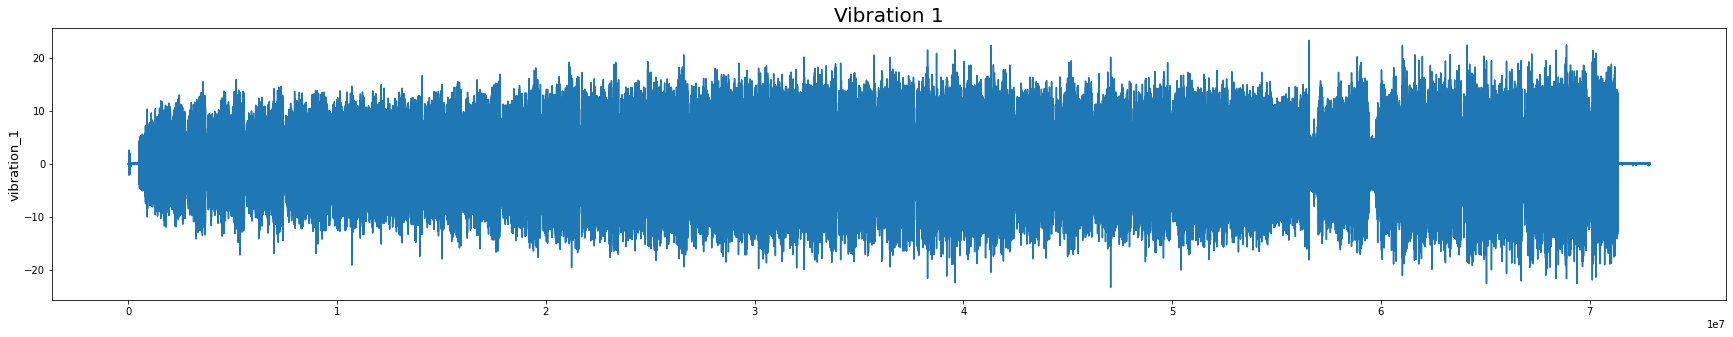

In [33]:
data01_sensor.vibration_1.plot.line(figsize=(30,5))
plt.title('Vibration 1', fontsize=20)
plt.ylabel('vibration_1', fontsize=13)

Text(0, 0.5, 'vibration_2')

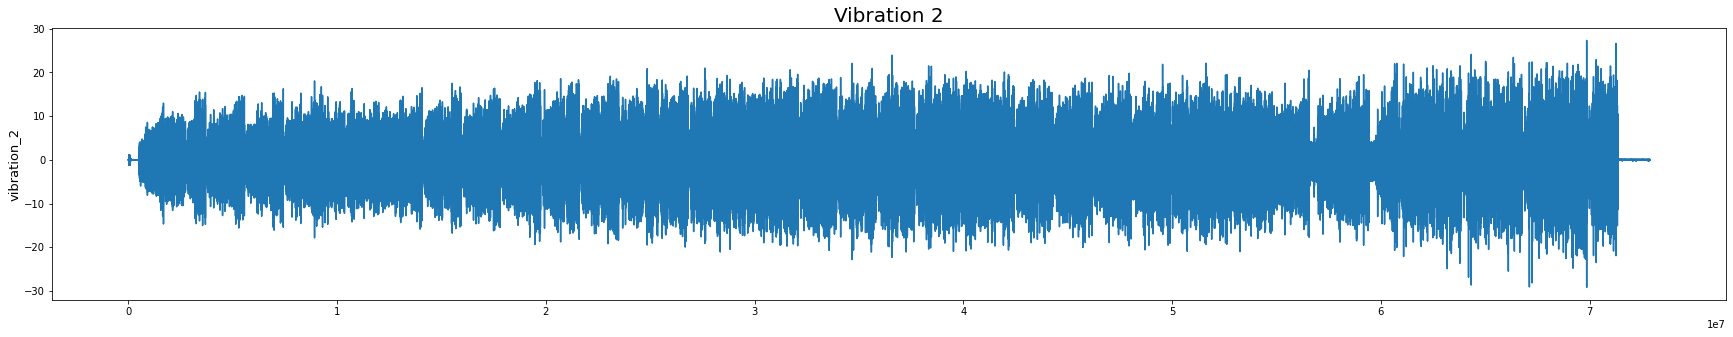

In [34]:
data01_sensor[abs(data01_sensor["vibration_2"])<30].vibration_2.plot.line(figsize=(30,5))
plt.title('Vibration 2', fontsize=20)
plt.ylabel('vibration_2', fontsize=13)

Text(0, 0.5, 'vibration_3')

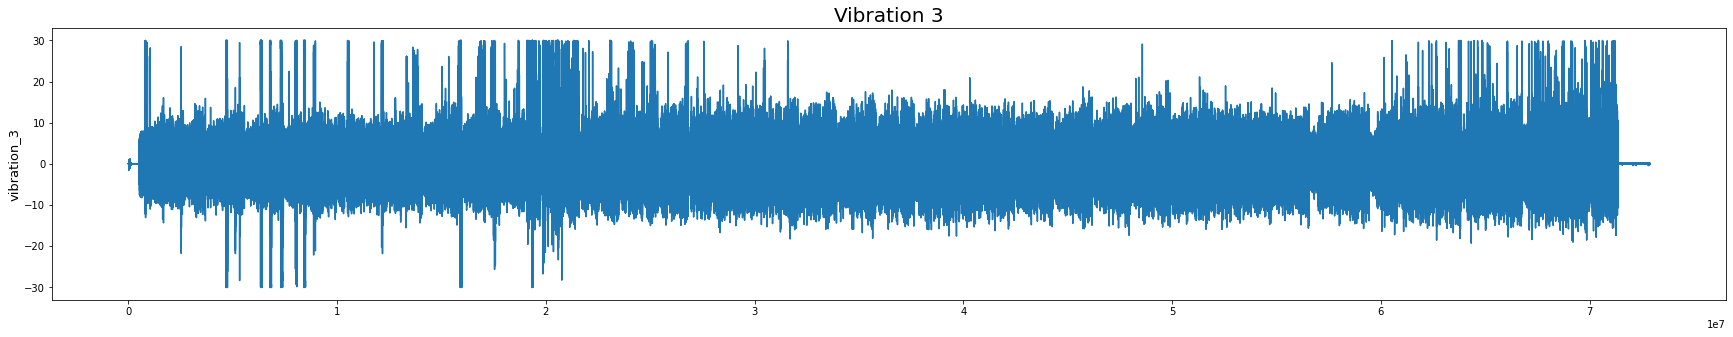

In [35]:
data01_sensor[abs(data01_sensor["vibration_3"])<30].vibration_3.plot.line(figsize=(30,5))
plt.title('Vibration 3', fontsize=20)
plt.ylabel('vibration_3', fontsize=13)

Text(0, 0.5, 'Current')

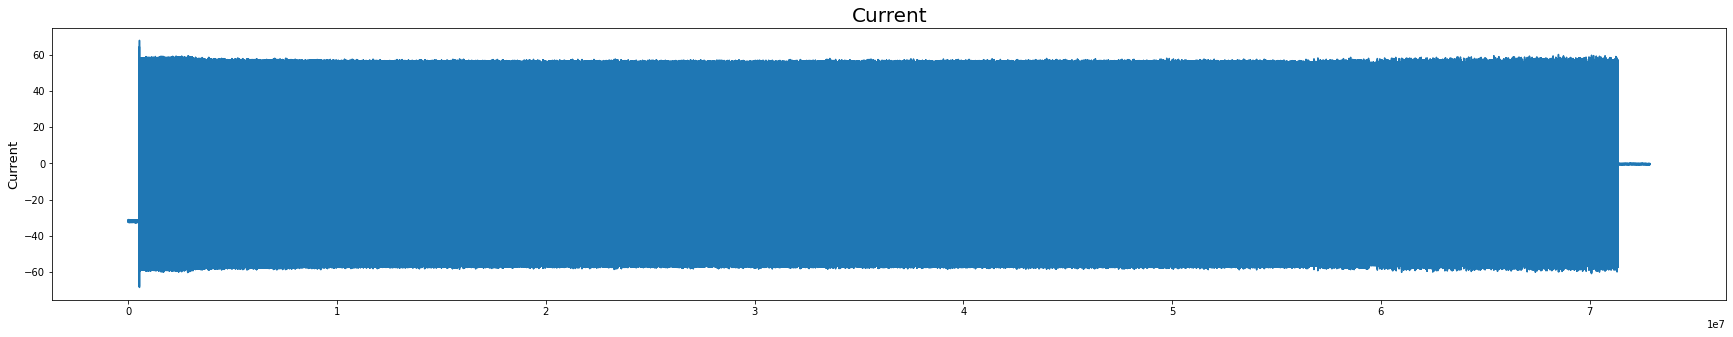

In [36]:
data01_sensor.current.plot.line(figsize=(30,5))
plt.title('Current', fontsize=20)
plt.ylabel('Current', fontsize=13)

In [37]:
#According to the line plots of vibration 1, 2,3 and current, the final samples of the dataset shows constant signals because the cutting tool is broken. 
#This part of the dataset should be deleted.
#Also, it's possible to limit the absolute value of vibration_2 and vibration_3 to 30. This is because [-30;30] is the range of 
#vibration_1 signal. It's posible to take this range as a reference.